# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



# Importing Dataset

In [2]:
train = pd.read_csv("G:\Train.csv")

In [3]:
test = pd.read_csv("G:\Test.csv")

In [4]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,50785,0.0,04/02/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,NaN
1,51630,0.0,04/02/2013,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,NaN
2,17168,0.0,01/02/2013,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,NaN
3,45559,0.0,22/01/2013,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,NaN
4,49871,500.0,27/03/2013,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,NaN


In [6]:
train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,13/03/2011,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,01/10/2012,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,09/10/2012,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,03/11/2012,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,03/08/2011,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


# Preparing Data For Training:- Pre-processing Data Using Elimination and LabelEncoder for                                                           Random Forest

In [7]:
traindataframe = pd.DataFrame(train)
testdataframe = pd.DataFrame(test)

traindataframe.drop(['id' ,'funder','scheme_name', 'recorded_by', 'region_code', 'latitude', 'longitude', 'amount_tsh', 'date_recorded', 'num_private', 'public_meeting', 'scheme_name', 'construction_year', 'quantity_group', 'extraction_type_group', 'waterpoint_type_group'], axis=1, inplace=True)

testdataframe.drop(['id' ,'funder','scheme_name', 'recorded_by', 'region_code', 'latitude', 'longitude', 'amount_tsh', 'date_recorded', 'num_private', 'public_meeting', 'scheme_name', 'construction_year', 'quantity_group', 'extraction_type_group', 'waterpoint_type_group'], axis=1, inplace=True)




# Sorting based on ID

In [8]:

traindataframe = traindataframe.sort_values('gps_height')

testdataframe = testdataframe.sort_values('gps_height')




# Preparing Data For Classification

In [9]:
traindataframe

,gps_height,installer,wpt_name,basin,subvillage,region,district_code,lga,ward,population,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group
58934,-90,MTUWASA,Kwa Makumburi,Ruvuma / Southern Coast,Mirumba,Mtwara,5,Mtwara Urban,Jangwani,550,...,pay per bucket,per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe multiple,functional
15193,-63,0,Kwa Kweka 2,Wami / Ruvu,Kwa Kweka 2,Dar es Salaam,3,Temeke,Mji Mwema,150,...,pay per bucket,per bucket,salty,salty,seasonal,machine dbh,borehole,groundwater,communal standpipe,functional
50296,-63,MTUWASA,Kioski Cha Miseti,Ruvuma / Southern Coast,Miseti,Mtwara,5,Mtwara Urban,Chuno,353,...,pay per bucket,per bucket,soft,good,seasonal,machine dbh,borehole,groundwater,communal standpipe multiple,functional
14285,-59,0,Kwa Mzee Said Mkarakara,Wami / Ruvu,Mbwamaji,Dar es Salaam,3,Temeke,Somangira,90,...,never pay,never pay,salty,salty,dry,machine dbh,borehole,groundwater,other,non functional
41165,-57,Centr,Fisheries,Rufiji,Nyamisati A,Pwani,53,Rufiji,Salale,1,...,pay per bucket,per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,functional
35046,-55,AMREF,Kiwanjani,Wami / Ruvu,Boza,Pwani,4,Mkuranga,Shungubweni,50,...,never pay,never pay,salty,salty,enough,shallow well,shallow well,groundwater,hand pump,non functional
3045,-54,0,Kwa Mohamed Bi Selemani,Wami / Ruvu,Mbwamaji,Dar es Salaam,3,Temeke,Somangira,140,...,never pay,never pay,salty,salty,dry,machine dbh,borehole,groundwater,other,non functional
39076,-53,FPTC,Pentecostal Church 3,Rufiji,Nyamisati A,Pwani,53,Rufiji,Salale,1,...,never pay,never pay,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,functional
54063,-52,FPCT,Fpct 2,Rufiji,Nyamisati A,Pwani,53,Rufiji,Salale,56,...,never pay,never pay,soft,good,seasonal,machine dbh,borehole,groundwater,communal standpipe,functional
48241,-52,0,Kwa Sharia,Wami / Ruvu,Buyuni,Dar es Salaam,3,Temeke,Pemba Mnazi,50,...,pay per bucket,per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,functional


In [10]:
testdataframe

,gps_height,installer,wpt_name,basin,subvillage,region,district_code,lga,ward,population,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group
11971,-57,Priva,Chia,Rufiji,Sunga Pwani,Pwani,53,Rufiji,Chumbi,1,...,pay per bucket,per bucket,soft,good,enough,shallow well,shallow well,groundwater,communal standpipe,NaN
9115,-56,Finland Government,Msikitini,Ruvuma / Southern Coast,Kiungani A,Lindi,23,Lindi Rural,Mchinga,1,...,unknown,unknown,soft,good,enough,machine dbh,borehole,groundwater,hand pump,NaN
7196,-51,US Embassy,Kwa Bi. Kuwini,Ruvuma / Southern Coast,Mchangani A,Lindi,23,Lindi Rural,Mchinga,1,...,never pay,never pay,salty,salty,insufficient,machine dbh,borehole,groundwater,hand pump,NaN
12470,-50,Do,Msikitini Bondeni,Wami / Ruvu,Bondeni,Pwani,1,Bagamoyo,Magomeni,50,...,never pay,never pay,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe,NaN
659,-48,Priva,Mwangaya,Rufiji,Malepea,Pwani,53,Rufiji,Ikwiriri,3226,...,pay per bucket,per bucket,soft,good,enough,machine dbh,borehole,groundwater,hand pump,NaN
2525,-48,DA,Kaoza,Wami / Ruvu,Kikonga,Pwani,1,Bagamoyo,Zinga/Ikerege,200,...,pay per bucket,per bucket,soft,good,enough,river,river/lake,surface,communal standpipe,NaN
732,-48,Unisef,Kwa Mzee Lo,Ruvuma / Southern Coast,Samwange,Mtwara,1,Mtwara Rural,Naumbu,30,...,pay per bucket,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe,NaN
2134,-47,Unisef,Kwahasani Hamisi,Ruvuma / Southern Coast,Mkaya,Mtwara,1,Mtwara Rural,Naumbu,300,...,pay per bucket,per bucket,soft,good,enough,machine dbh,borehole,groundwater,communal standpipe multiple,NaN
8428,-47,0,Shuleni 2,Wami / Ruvu,Shuleni,Dar es Salaam,3,Temeke,Somangira,140,...,never pay,never pay,salty,salty,dry,machine dbh,borehole,groundwater,communal standpipe,NaN
6522,-46,Unisef,Kwa Mzee Omary,Ruvuma / Southern Coast,Pakaya,Mtwara,1,Mtwara Rural,Naumbu,500,...,pay per bucket,per bucket,soft,good,enough,spring,spring,groundwater,communal standpipe multiple,NaN


# Hot-Encoding all values of Train and Test Datasets

# Train Dataset


In [11]:
x0 = traindataframe.iloc[:, 0].values
x1 = traindataframe.iloc[:, 1].values
x2 = traindataframe.iloc[:, 2].values
x3 = traindataframe.iloc[:, 3].values
x4 = traindataframe.iloc[:, 4].values
x5 = traindataframe.iloc[:, 5].values
x6 = traindataframe.iloc[:, 6].values
x7 = traindataframe.iloc[:, 7].values
x8 = traindataframe.iloc[:, 8].values
x9 = traindataframe.iloc[:, 9].values
x10 = traindataframe.iloc[:, 10].values
x11 = traindataframe.iloc[:, 11].values
x12 = traindataframe.iloc[:, 12].values
x13 = traindataframe.iloc[:, 13].values
x14 = traindataframe.iloc[:, 14].values
x15 = traindataframe.iloc[:, 15].values
x16 = traindataframe.iloc[:, 16].values
x17 = traindataframe.iloc[:, 17].values
x18 = traindataframe.iloc[:, 18].values
x19 = traindataframe.iloc[:, 19].values
x20 = traindataframe.iloc[:, 20].values
x21 = traindataframe.iloc[:, 21].values
x22 = traindataframe.iloc[:, 22].values
x23 = traindataframe.iloc[:, 23].values
x24 = traindataframe.iloc[:, 24].values
x25 = traindataframe.iloc[:, 25].values


In [12]:
le = LabelEncoder()


x0 = le.fit_transform(x0.astype(str))

x1 = le.fit_transform(x1.astype(str))

x2 = le.fit_transform(x2.astype(str))

x3 = le.fit_transform(x3.astype(str))

x4 = le.fit_transform(x4.astype(str))

x5 = le.fit_transform(x5.astype(str))

x6 = le.fit_transform(x6.astype(str))

x7 = le.fit_transform(x7.astype(str))

x8 = le.fit_transform(x8.astype(str))

x9 = le.fit_transform(x9.astype(str))

x10 = le.fit_transform(x10.astype(str))

x11 = le.fit_transform(x11.astype(str))

x12 = le.fit_transform(x12.astype(str))

x13 = le.fit_transform(x13.astype(str))

x14 = le.fit_transform(x14.astype(str))

x15 = le.fit_transform(x15.astype(str))

x16 = le.fit_transform(x16.astype(str))

x17 = le.fit_transform(x17.astype(str))

x18 = le.fit_transform(x18.astype(str))

x19 = le.fit_transform(x19.astype(str))

x20 = le.fit_transform(x20.astype(str))

x21 = le.fit_transform(x21.astype(str))

x22 = le.fit_transform(x22.astype(str))

x23 = le.fit_transform(x23.astype(str))

x24 = le.fit_transform(x24.astype(str))

x25 = le.fit_transform(x25.astype(str))


encoded_dataframe = pd.DataFrame({'gps_height' : x0,
                                  'installer' : x1,
                                  'wpt_name' : x2,
                                  'basin' : x3,
                                  'subvillage' : x4,
                                  'region' : x5,
                                  'district_code' : x6,
                                  'lga' : x7,
                                  'ward' : x8,
                                  'population' : x9,
                                  'scheme_management' : x10,
                                  'permit' : x11,
                                  'extraction_type' : x12,
                                  'extraction_type_class' : x13,
                                  'management' : x14,
                                  'management_group' : x15,
                                  'payment' : x16,
                                  'payment_type' : x17,
                                  'water_quality' : x18,
                                  'quality_group' : x19,
                                  'quantity' : x20,
                                  'source' : x21,
                                  'source_type' : x22,
                                  'source_class' : x23,
                                  'waterpoint_type' : x24,
                                  'status_group' : x25})



#x_train = traindataframe.iloc[:, 0:26].values  
#y_train = traindataframe.iloc[:, 26].values  

#x_test = testdataframe.iloc[:, 0:26].values
#y_test = testdataframe.iloc[:, 26].values

#train1 = traindataframe
#test1 = testdataframe


# Test Dataset

In [13]:
y0 = testdataframe.iloc[:, 0].values
y1 = testdataframe.iloc[:, 1].values
y2 = testdataframe.iloc[:, 2].values
y3 = testdataframe.iloc[:, 3].values
y4 = testdataframe.iloc[:, 4].values
y5 = testdataframe.iloc[:, 5].values
y6 = testdataframe.iloc[:, 6].values
y7 = testdataframe.iloc[:, 7].values
y8 = testdataframe.iloc[:, 8].values
y9 = testdataframe.iloc[:, 9].values
y10 = testdataframe.iloc[:, 10].values
y11 = testdataframe.iloc[:, 11].values
y12 = testdataframe.iloc[:, 12].values
y13 = testdataframe.iloc[:, 13].values
y14 = testdataframe.iloc[:, 14].values
y15 = testdataframe.iloc[:, 15].values
y16 = testdataframe.iloc[:, 16].values
y17 = testdataframe.iloc[:, 17].values
y18 = testdataframe.iloc[:, 18].values
y19 = testdataframe.iloc[:, 19].values
y20 = testdataframe.iloc[:, 20].values
y21 = testdataframe.iloc[:, 21].values
y22 = testdataframe.iloc[:, 22].values
y23 = testdataframe.iloc[:, 23].values
y24 = testdataframe.iloc[:, 24].values
y25 = testdataframe.iloc[:, 25].values


In [14]:


y0 = le.fit_transform(y0.astype(str))

y1 = le.fit_transform(y1.astype(str))

y2 = le.fit_transform(y2.astype(str))

y3 = le.fit_transform(y3.astype(str))

y4 = le.fit_transform(y4.astype(str))

y5 = le.fit_transform(y5.astype(str))

y6 = le.fit_transform(y6.astype(str))

y7 = le.fit_transform(y7.astype(str))

y8 = le.fit_transform(y8.astype(str))

y9 = le.fit_transform(y9.astype(str))

y10 = le.fit_transform(y10.astype(str))

y11 = le.fit_transform(y11.astype(str))

y12 = le.fit_transform(y12.astype(str))

y13 = le.fit_transform(y13.astype(str))

y14 = le.fit_transform(y14.astype(str))

y15 = le.fit_transform(y15.astype(str))

y16 = le.fit_transform(y16.astype(str))

y17 = le.fit_transform(y17.astype(str))

y18 = le.fit_transform(y18.astype(str))

y19 = le.fit_transform(y19.astype(str))

y20 = le.fit_transform(y20.astype(str))

y21 = le.fit_transform(y21.astype(str))

y22 = le.fit_transform(y22.astype(str))

y23 = le.fit_transform(y23.astype(str))

y24 = le.fit_transform(y24.astype(str))

y25 = le.fit_transform(y25.astype(str))


encoded_dataframe2 = pd.DataFrame({'gps_height' : y0,
                                  'installer' : y1,
                                  'wpt_name' : y2,
                                  'basin' : y3,
                                  'subvillage' : y4,
                                  'region' : y5,
                                  'district_code' : y6,
                                  'lga' : y7,
                                  'ward' : y8,
                                  'population' : y9,
                                  'scheme_management' : y10,
                                  'permit' : y11,
                                  'extraction_type' : y12,
                                  'extraction_type_class' : y13,
                                  'management' : y14,
                                  'management_group' : y15,
                                  'payment' : y16,
                                  'payment_type' : y17,
                                  'water_quality' : y18,
                                  'quality_group' : y19,
                                  'quantity' : y20,
                                  'source' : y21,
                                  'source_type' : y22,
                                  'source_class' : y23,
                                  'waterpoint_type' : y24,
                                  'status_group' : y25})


# Merging all the columns into a single DataFrame

In [15]:
#encoded_traindataframe = pd.DataFrame(traindataframe, columns = ['gps_height', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'district_code', 'lga', 'ward', 'population', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'status_group' ])

encoded_traindataframe = pd.DataFrame(encoded_dataframe, columns = ['gps_height', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'district_code', 'lga', 'ward', 'population', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'status_group' ])


encoded_testdataframe = pd.DataFrame(encoded_dataframe2, columns = ['gps_height', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'district_code', 'lga', 'ward', 'population', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'status_group' ])




In [16]:
encoded_traindataframe

,gps_height,installer,wpt_name,basin,subvillage,region,district_code,lga,ward,population,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group
0,58,1051,14719,7,11062,12,10,78,466,728,...,4,5,6,2,1,3,0,0,2,0
1,54,1,13584,8,7319,1,5,119,1254,147,...,4,5,4,4,3,3,0,0,1,0
2,54,1051,6287,7,11085,12,10,78,203,500,...,4,5,6,2,3,3,0,0,2,0
3,52,1,19858,8,10428,1,5,119,1920,1003,...,0,2,4,4,0,3,0,0,6,2
4,51,267,2671,6,15973,14,11,99,1846,1,...,4,5,6,2,1,3,0,0,1,0
5,50,41,6745,8,470,14,8,69,1893,668,...,0,2,4,4,1,7,5,0,4,2
6,49,1,16571,8,10428,1,5,119,1920,122,...,0,2,4,4,0,3,0,0,6,2
7,48,492,33451,6,15973,14,11,99,1846,1,...,0,2,6,2,1,3,0,0,1,0
8,47,490,2686,6,15973,14,11,99,1846,737,...,0,2,6,2,3,3,0,0,1,0
9,47,1,22799,8,1121,1,5,119,1779,668,...,4,5,6,2,1,3,0,0,1,0


In [17]:
encoded_testdataframe

,gps_height,installer,wpt_name,basin,subvillage,region,district_code,lga,ward,population,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,status_group
0,47,713,550,6,7862,14,11,99,183,1,...,4,5,6,2,1,7,5,0,1,0
1,46,278,8495,7,3009,7,4,47,1096,1,...,6,6,6,2,1,3,0,0,4,0
2,45,939,2474,7,4628,7,4,47,1096,1,...,0,2,4,4,2,3,0,0,4,0
3,44,240,8498,8,201,14,1,3,922,423,...,0,2,6,2,1,3,0,0,1,0
4,42,713,8856,6,4137,14,11,99,337,288,...,4,5,6,2,1,3,0,0,4,0
5,42,190,1533,8,2584,14,1,3,1952,152,...,4,5,6,2,1,6,4,1,1,0
6,42,949,5298,7,7531,12,1,77,1476,266,...,4,5,6,2,1,8,6,0,1,0
7,41,949,7038,7,4993,12,1,77,1476,267,...,4,5,6,2,1,3,0,0,2,0
8,41,0,10258,8,7715,1,5,119,1800,72,...,0,2,4,4,0,3,0,0,1,0
9,40,949,5589,7,7271,12,1,77,1476,424,...,4,5,6,2,1,8,6,0,2,0


In [18]:
x_train = encoded_traindataframe.iloc[:, 0:25].values  
y_train = encoded_traindataframe.iloc[:, 25].values  

x_test = encoded_testdataframe.iloc[:, 0:25].values
y_test = encoded_testdataframe.iloc[:, 25].values




# Training and Predicting - Classification Using Random Forest


In [19]:
classifier = RandomForestClassifier(n_estimators=243, random_state=0) #240 is the approx root of 59400 datasets which should be the value of 'n' in Random Forest


classifier.fit(x_train, y_train)

class_predict = classifier.predict(x_test)





In [20]:

class_predict

array([0, 2, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
print(confusion_matrix(y_test,class_predict))  
print(classification_report(y_test,class_predict))  
print('Accuracy Score is : ', (accuracy_score(y_test, class_predict)*100))

[[9296  342 5212]
 [   0    0    0]
 [   0    0    0]]
              precision    recall  f1-score   support

           0       1.00      0.63      0.77     14850
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.63     14850
   macro avg       0.33      0.21      0.26     14850
weighted avg       1.00      0.63      0.77     14850

Accuracy Score is :  62.5993265993266


In [24]:
import matplotlib.pyplot as plt

In [25]:
col0 = encoded_traindataframe.iloc[:, 0].values
col1 = encoded_traindataframe.iloc[:, 1].values
col2 = encoded_traindataframe.iloc[:, 2].values
col3 = encoded_traindataframe.iloc[:, 3].values
col4 = encoded_traindataframe.iloc[:, 4].values
col5 = encoded_traindataframe.iloc[:, 5].values
col6 = encoded_traindataframe.iloc[:, 6].values
col7 = encoded_traindataframe.iloc[:, 7].values
col8 = encoded_traindataframe.iloc[:, 8].values
col9 = encoded_traindataframe.iloc[:, 9].values
col10 = encoded_traindataframe.iloc[:, 10].values
col11 = encoded_traindataframe.iloc[:, 11].values
col12 = encoded_traindataframe.iloc[:, 12].values
col13 = encoded_traindataframe.iloc[:, 13].values
col14 = encoded_traindataframe.iloc[:, 14].values
col15 = encoded_traindataframe.iloc[:, 15].values
col16 = encoded_traindataframe.iloc[:, 16].values
col17 = encoded_traindataframe.iloc[:, 17].values
col18 = encoded_traindataframe.iloc[:, 18].values
col19 = encoded_traindataframe.iloc[:, 19].values
col20 = encoded_traindataframe.iloc[:, 20].values
col21 = encoded_traindataframe.iloc[:, 21].values
col22 = encoded_traindataframe.iloc[:, 22].values
col23 = encoded_traindataframe.iloc[:, 23].values
col24 = encoded_traindataframe.iloc[:, 24].values
col25 = encoded_traindataframe.iloc[:, 25].values

Text(0, 0.5, 'status_group')

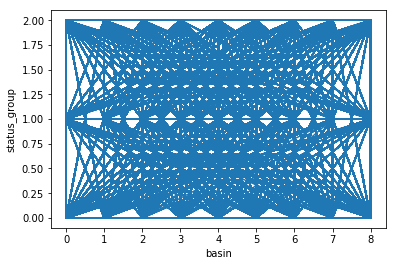

In [26]:
plt.plot(col3, col25, 0)
plt.xlabel('basin')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

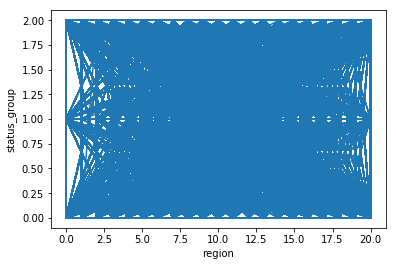

In [27]:
plt.plot(col5, col25, 0)
plt.xlabel('region')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

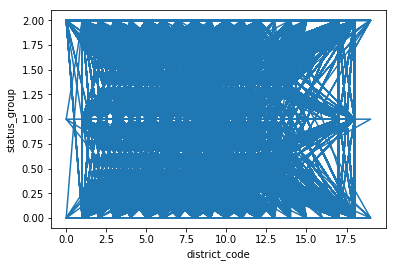

In [28]:
plt.plot(col6, col25, 0)
plt.xlabel('district_code')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

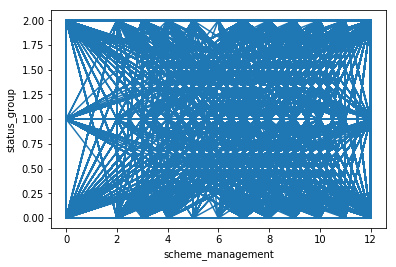

In [29]:
plt.plot(col10, col25, 0)
plt.xlabel('scheme_management')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

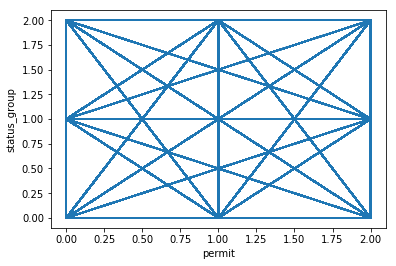

In [30]:
plt.plot(col11, col25, 0)
plt.xlabel('permit')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

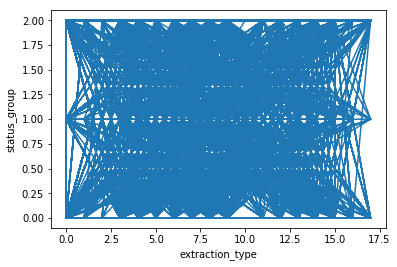

In [31]:
plt.plot(col12, col25, 0)
plt.xlabel('extraction_type')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

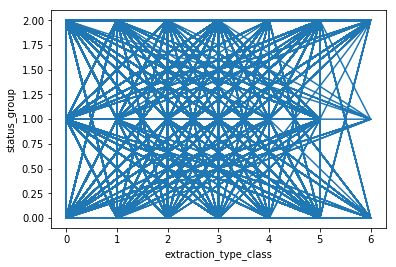

In [32]:
plt.plot(col13, col25, 0)
plt.xlabel('extraction_type_class')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

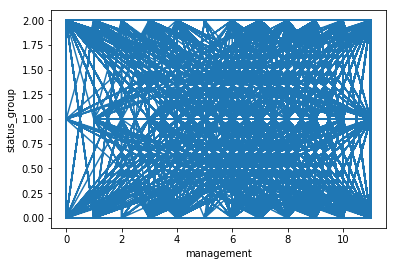

In [33]:
plt.plot(col14, col25, 0)
plt.xlabel('management')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

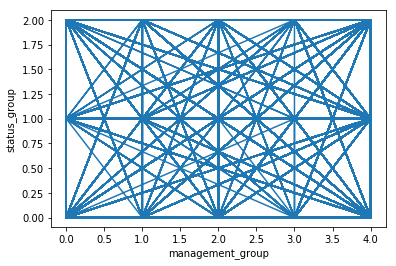

In [34]:
plt.plot(col15, col25, 0)
plt.xlabel('management_group')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

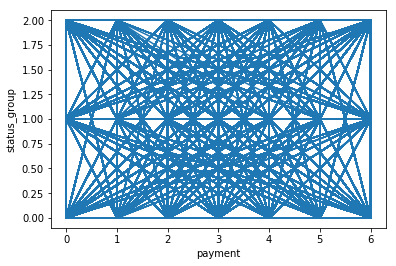

In [35]:
plt.plot(col16, col25, 0)
plt.xlabel('payment')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

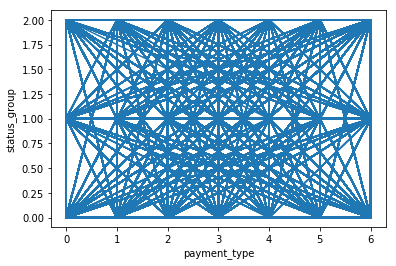

In [36]:
plt.plot(col17, col25, 0)
plt.xlabel('payment_type')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

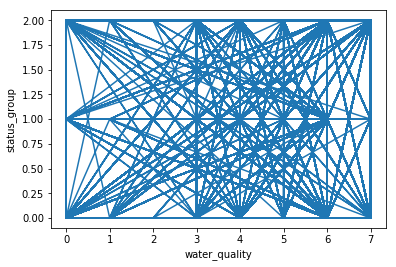

In [37]:

plt.plot(col18, col25, 0)
plt.xlabel('water_quality')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

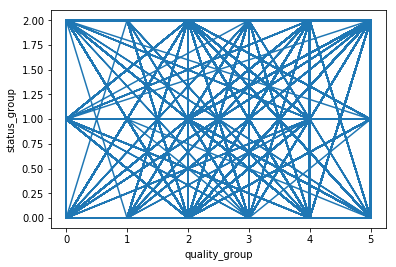

In [38]:
plt.plot(col19, col25, 0)
plt.xlabel('quality_group')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

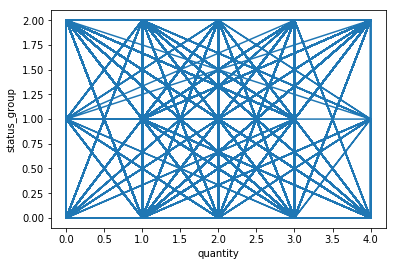

In [39]:
plt.plot(col20, col25, 0)
plt.xlabel('quantity')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

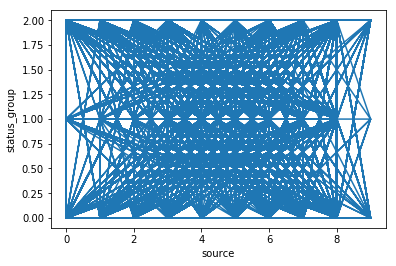

In [40]:
plt.plot(col21, col25, 0)
plt.xlabel('source')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

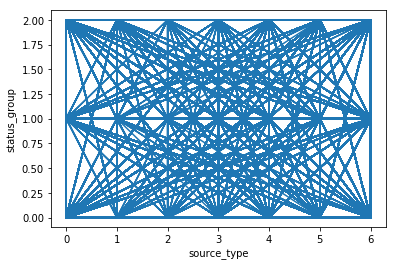

In [41]:
plt.plot(col22, col25, 0)
plt.xlabel('source_type')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

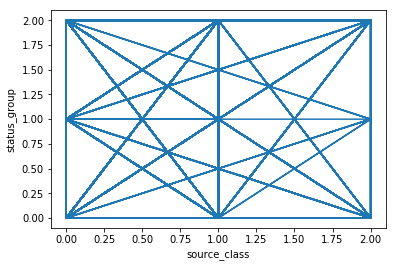

In [42]:
plt.plot(col23, col25, 0)
plt.xlabel('source_class')
plt.ylabel('status_group')

Text(0, 0.5, 'status_group')

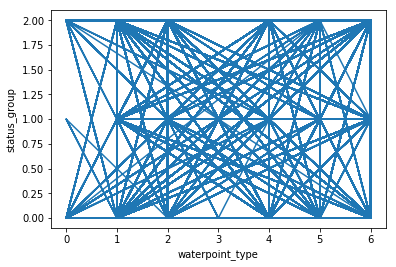

In [43]:
plt.plot(col24, col25, 0)
plt.xlabel('waterpoint_type')
plt.ylabel('status_group')